In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import h5py

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # Sets Default Size of Plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [14]:
# Load Image Dataset
def load_dataset():
    np.random.seed(1)
    X_train, Y_train = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    X_test, Y_test = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    
    # Visualize the Data
    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, s=40, cmap=plt.cm.Spectral);
    X_train = X_train.T
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    X_test = X_test.T
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    return X_train, Y_train, X_test, Y_test

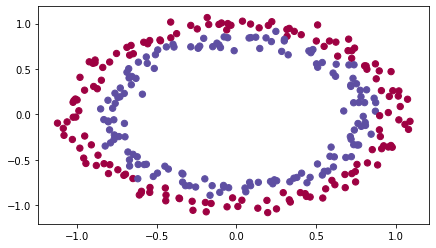

In [15]:
X_train, Y_train, X_test, Y_test = load_dataset()

In [16]:
# Activation Functions
def sigmoid(x):
    """Compute the sigmoid of x
    
    Arguments:
    x -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(x)
    """
    s = 1/(1 + np.exp(-x))
    return s

def relu(x):
    """Compute the sigmoid of x
    
    Arguments:
    x -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(x)
    """
    
    s = np.maximum(0, x)
    
    return s

In [17]:
def initialize_paramters_zero(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your paramters "W1", "b1", ..., "WL", "bL":
    W1 - Weight Matrix of Shape (layers_dims[1], layers_dims[0])
    b1 - Bias Vector of Shape (layers_dims[1], 1)
    ...
    WL - Weight Matrix of Shape (layers_dims[L], layers_dims[L-1])
    bL - Bias Vector of Shape (layers_dims[L], 1)
    """
    parameters = {}
    L = len(layers_dims) # Number of Layers in the Network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [18]:
parameters = initialize_paramters_zero([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


In [19]:
def initialize_paramters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your paramters "W1", "b1", ..., "WL", "bL":
    W1 - Weight Matrix of Shape (layers_dims[1], layers_dims[0])
    b1 - Bias Vector of Shape (layers_dims[1], 1)
    ...
    WL - Weight Matrix of Shape (layers_dims[L], layers_dims[L-1])
    bL - Bias Vector of Shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) # Number of Layers in the Network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [21]:
parameters = initialize_paramters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


In [23]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your paramters "W1", "b1", ..., "WL", "bL":
    W1 - Weight Matrix of Shape (layers_dims[1], layers_dims[0])
    b1 - Bias Vector of Shape (layers_dims[1], 1)
    ...
    WL - Weight Matrix of Shape (layers_dims[L], layers_dims[L-1])
    bL - Bias Vector of Shape (layers_dims[L], 1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) # Number of Layers in the Network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [24]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


In [25]:
def forward_propogation(X, parameters):
    """
    Implements the forward propagation (and computes the loss).
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape ()
                    b1 -- bias vector of shape ()
                    W2 -- weight matrix of shape ()
                    b2 -- bias vector of shape ()
                    W3 -- weight matrix of shape ()
                    b3 -- bias vector of shape ()
    
    Returns:
    loss -- the loss function (vanilla logistic loss)
    """
    # Retrieve Parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1,X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2,a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3,a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

In [26]:
def compute_loss(a3, Y):
    """Implement the loss function
    
    Arguments:
    a3 -- Post-Activation, Output of Forward Propogation
    Y -- "True" labels Vector, same shape as a3
    
    Returns:
    loss - value of the loss function
    """
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1-a3), 1-Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

In [ ]:
def backward_propogation(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat)
    cache -- cache output from forward_propagation()
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    
    da2 = np.dot(W3.T, dz3)
    
    
    